In [ ]:
from google.colab import files  # Import the "files" module from the "google.colab" library

files.upload()  # Choose the kaggle.json file for your device

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"saraahishamm","key":"38dc15404e0230c048a10167d8b6f73c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 98% 338M/346M [00:02<00:00, 116MB/s]
100% 346M/346M [00:02<00:00, 151MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("intel-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("intel-image-classification")

In [ ]:
import os
os.listdir("intel-image-classification")

['seg_train', 'seg_pred', 'seg_test']

# Importing packages and reading images using image generator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import keras
import random
from  keras.applications.efficientnet import EfficientNetB1,preprocess_input,decode_predictions
import warnings
warnings.simplefilter(action="ignore")

In [ ]:
train_path = r"intel-image-classification/seg_train/seg_train"
test_path = r"intel-image-classification/seg_test/seg_test"
pred_path = r"intel-image-classification/seg_pred/seg_pred"
img_size = (150,150)
mode="rgb"
batch_s = 128

In [33]:
# Check the file names in the prediction folder
pred_path = "intel-image-classification/seg_pred/seg_pred"
file_names = os.listdir(pred_path)

file_names

['23994.jpg',
 '12261.jpg',
 '2271.jpg',
 '13381.jpg',
 '8174.jpg',
 '9110.jpg',
 '2133.jpg',
 '3096.jpg',
 '6179.jpg',
 '19906.jpg',
 '3363.jpg',
 '18030.jpg',
 '12183.jpg',
 '22840.jpg',
 '2631.jpg',
 '11695.jpg',
 '12972.jpg',
 '20789.jpg',
 '10764.jpg',
 '10890.jpg',
 '3324.jpg',
 '8290.jpg',
 '5322.jpg',
 '10390.jpg',
 '682.jpg',
 '16480.jpg',
 '16319.jpg',
 '8391.jpg',
 '17943.jpg',
 '4219.jpg',
 '12516.jpg',
 '8508.jpg',
 '1889.jpg',
 '14017.jpg',
 '10021.jpg',
 '16329.jpg',
 '7296.jpg',
 '600.jpg',
 '23358.jpg',
 '18528.jpg',
 '13786.jpg',
 '21282.jpg',
 '1945.jpg',
 '23202.jpg',
 '19123.jpg',
 '9328.jpg',
 '20661.jpg',
 '1438.jpg',
 '5608.jpg',
 '17035.jpg',
 '930.jpg',
 '11549.jpg',
 '6800.jpg',
 '13889.jpg',
 '10321.jpg',
 '1119.jpg',
 '3673.jpg',
 '21072.jpg',
 '21836.jpg',
 '13704.jpg',
 '13295.jpg',
 '3897.jpg',
 '10293.jpg',
 '23397.jpg',
 '4652.jpg',
 '19759.jpg',
 '22333.jpg',
 '19801.jpg',
 '20682.jpg',
 '3301.jpg',
 '16337.jpg',
 '10813.jpg',
 '21899.jpg',
 '18782.jp

In [ ]:
for file in os.listdir(train_path):
    print(file)

forest
buildings
street
glacier
sea
mountain


In [ ]:
train_val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,
    rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	fill_mode="nearest")
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data = train_val_generator.flow_from_directory(
    train_path,
    target_size=img_size,
    color_mode=mode,
    batch_size=batch_s,
    class_mode="categorical",
    shuffle=True,
    seed=7,
    subset="training"
)

val_data = train_val_generator.flow_from_directory(
    train_path,
    target_size=img_size,
    color_mode=mode,
    batch_size=batch_s,
    class_mode="categorical",
    shuffle=True,
    seed=7,
    subset="validation"
)

test_data = test_generator.flow_from_directory(
    test_path,
    target_size=img_size,
    color_mode=mode,
    batch_size=batch_s,
    class_mode="categorical",
    shuffle=False,
    seed=7,
)

Found 10528 images belonging to 6 classes.
Found 3506 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Taking a look at the images

In [ ]:
train_counts = {expression: len(os.listdir(os.path.join(train_path, expression)))
                for expression in os.listdir(train_path)}
train_count_df = pd.DataFrame(train_counts, index=['train'])

In [ ]:
test_counts = {expression: len(os.listdir(os.path.join(test_path, expression)))
               for expression in os.listdir(test_path)}
test_count_df = pd.DataFrame(test_counts, index=['test'])

In [ ]:
train_count_df

,forest,buildings,street,glacier,sea,mountain
train,2271,2191,2382,2404,2274,2512


In [ ]:
test_count_df

,forest,buildings,street,glacier,sea,mountain
test,474,437,501,553,510,525


<Axes: >

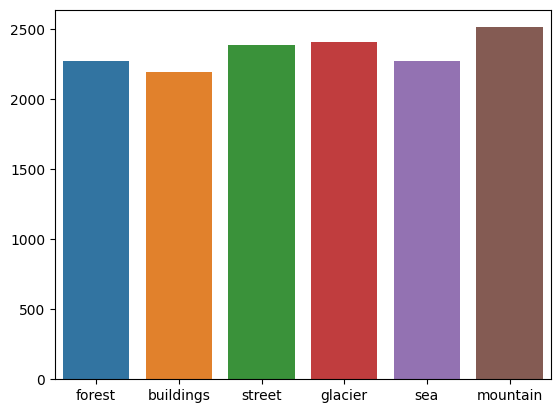

In [ ]:
sns.barplot(data=train_count_df)

<Axes: >

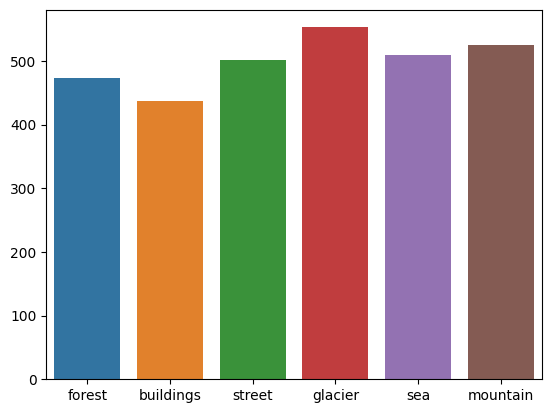

In [ ]:
sns.barplot(data=test_count_df)

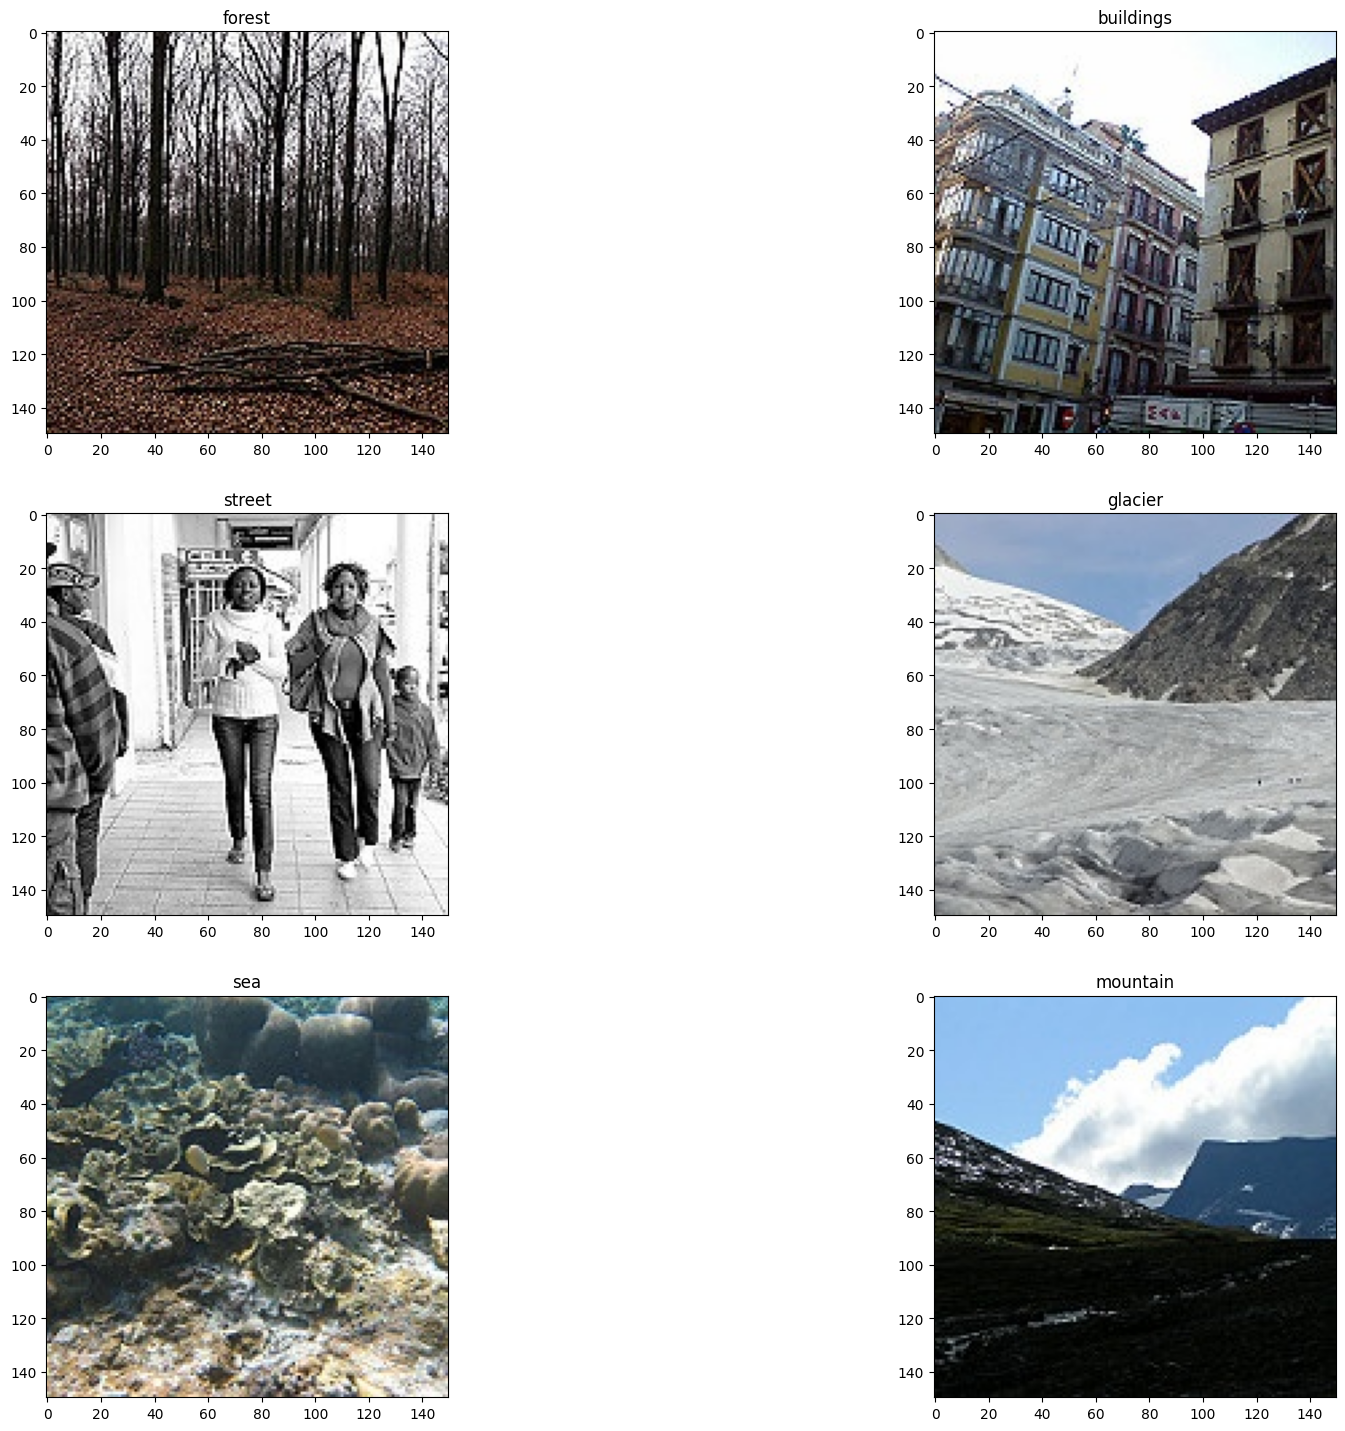

In [ ]:
class_dirs = os.listdir(train_path)
plt.figure(figsize=(21, 24))
for i in range(len(class_dirs)):
    plt.subplot(4,2,i+1)
    img_path = f"{train_path}/{class_dirs[i]}/{os.listdir(f'{train_path}/{class_dirs[i]}')[0]}"
    img = plt.imread(img_path)
    plt.title(class_dirs[i])
    plt.imshow(img,cmap="brg")

# Setting up EfficientNet B1 model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, Dense
from tensorflow.keras.optimizers import Adamax

input_tensor = Input(shape=(150, 150, 3))

base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='max')
x = base_model.output
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adamax(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Training and Evaluating the model


In [ ]:
history = model.fit(train_data,validation_data=val_data, epochs=25)

Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.3815 - loss: 1.6654 - val_accuracy: 0.1603 - val_loss: 2.0119
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.7657 - loss: 0.6679 - val_accuracy: 0.2054 - val_loss: 2.3148
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8554 - loss: 0.4403 - val_accuracy: 0.1689 - val_loss: 2.5518
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8866 - loss: 0.3459 - val_accuracy: 0.2365 - val_loss: 2.1659
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9020 - loss: 0.2951 - val_accuracy: 0.2424 - val_loss: 2.1811
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9148 - loss: 0.2668 - val_accuracy: 0.4076 - val_loss: 1.7001
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9184 - loss: 0.2417 - val_accuracy: 0.5185 - val_loss: 1.3750
Epoch 8/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9281 - loss: 0.2320 - val_accuracy: 0.7065 - v

In [ ]:
model.evaluate(test_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.9231 - loss: 0.3821


[0.32501620054244995, 0.9313333630561829]

In [ ]:
# Generate predictions
y_pred = model.predict(test_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 308ms/step


In [ ]:
# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_data.classes

In [ ]:
# Get class names
class_names = list(test_data.class_indices.keys())

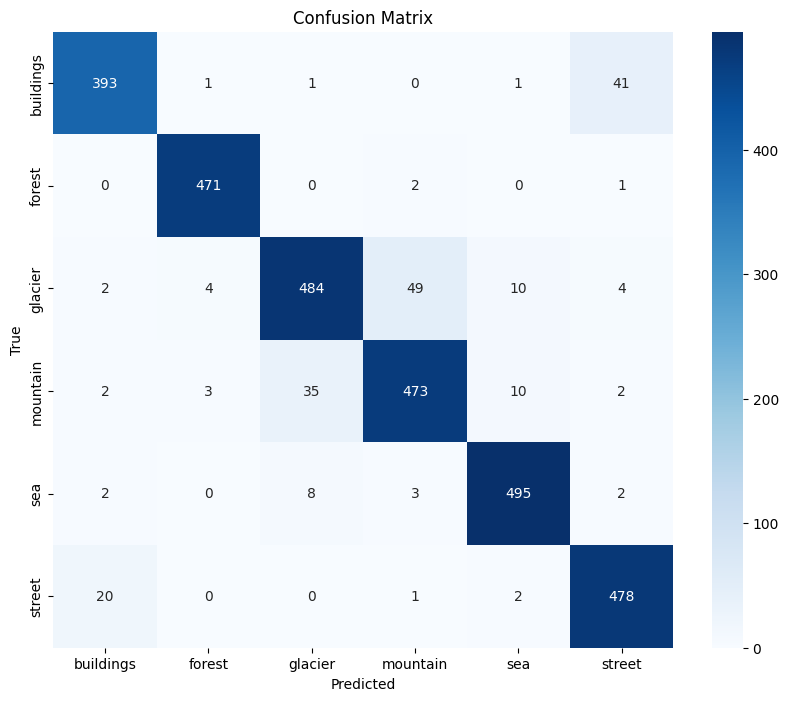

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

   buildings       0.94      0.90      0.92       437
      forest       0.98      0.99      0.99       474
     glacier       0.92      0.88      0.90       553
    mountain       0.90      0.90      0.90       525
         sea       0.96      0.97      0.96       510
      street       0.91      0.95      0.93       501

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [36]:
print(f"Processing file: {file_name}, Extracted true_label: {true_label}")

Processing file: 9730.jpg, Extracted true_label: 9730.jpg


In [37]:
print(f"Class Names: {class_names}")

Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [39]:
true_label = file_name.split('_')[0]

In [42]:
# Generate predictions
y_pred = model.predict(test_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step


In [41]:
# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_data.classes

In [44]:
# Get class names
class_names = list(test_data.class_indices.keys())
print(f"Class Names: {class_names}")


Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [46]:
# Predict on images from pred folder (limited count)


def predict_images_limited(pred_path, model, class_names, limit=10):
    files = os.listdir(pred_path)[:limit]  # Limit the number of files to process
    for file_name in files:
        file_path = os.path.join(pred_path, file_name)
        img = tf.keras.utils.load_img(file_path, target_size=img_size)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
        img_array = img_array / 255.0  # Rescale image

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        true_label = file_name.split('_')[0]  # Assuming file names are formatted as "label_filename.jpg"

        print(f"Processing file: {file_name}")
        print(f"Extracted true_label: {true_label}")
        print(f"Image Shape: {img_array.shape}")
        print(f"Predicted Label: {class_names[predicted_class]}")
        print(f"Prediction Correct: {true_label == class_names[predicted_class]}")
        print("-" * 30)

# Predict on a limited number of images in pred folder
predict_images_limited(pred_path, model, class_names, limit=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing file: 23994.jpg
Extracted true_label: 23994.jpg
Image Shape: (1, 150, 150, 3)
Predicted Label: mountain
Prediction Correct: False
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing file: 12261.jpg
Extracted true_label: 12261.jpg
Image Shape: (1, 150, 150, 3)
Predicted Label: forest
Prediction Correct: False
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing file: 2271.jpg
Extracted true_label: 2271.jpg
Image Shape: (1, 150, 150, 3)
Predicted Label: sea
Prediction Correct: False
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing file: 13381.jpg
Extracted true_label: 13381.jpg
Image Shape: (1, 150, 150, 3)
Predicted Label: street
Prediction Correct: False
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing file: 8174.jpg
Extracted true_label: 8174.jpg
Image Shape: (1, 150, 150, 3)
Predicted Label: sea
Prediction Correct: False